# **Aim: Predicting Airlines Passenger count base in LSTM,GRU,RNN**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [ ]:
data=pd.read_csv('AirPassengers.csv')

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, SimpleRNN, LSTM,GRU
from keras.models import Sequential

In [ ]:
data.columns = ['Date', 'Passengers']
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
data[['Passengers']] = scaler.fit_transform(data[['Passengers']])
data.head()

,Passengers
Date,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


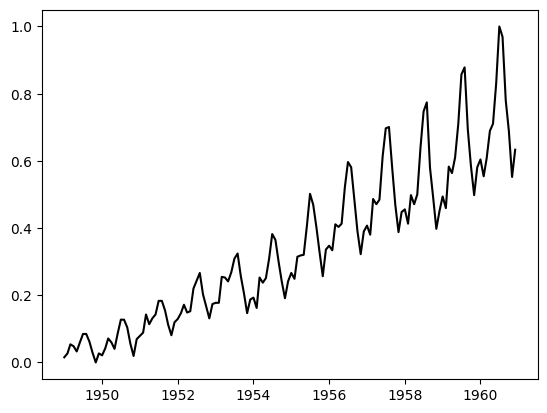

In [ ]:
plt.plot(data, color='black')
plt.show()

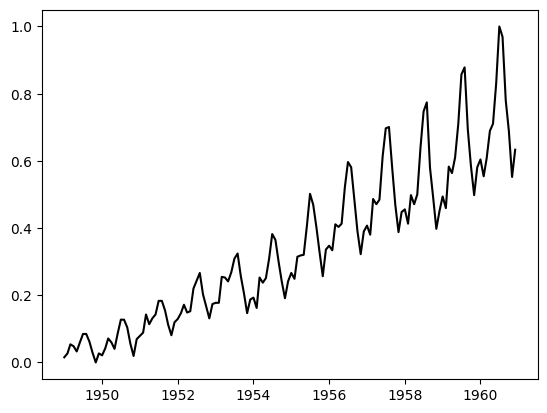

In [ ]:
plt.plot(data, color='black')
plt.show()

In [ ]:
def load_data(data, seq_len):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
    return x,y

In [ ]:
x, y = load_data(data, 20)

In [ ]:
data.shape

(144, 1)

In [ ]:
num = int(len(data['Passengers'])*0.8)
num

115

In [ ]:
x_train = x[:num]
y_train = y[:num]
x_test = x[num:]
y_test = y[num:]

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (num, 20, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 20, 1))

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (115, 20, 1)
y_train.shape =  (115,)
x_test.shape =  (9, 20, 1)
y_test.shape =  (9,)


RNN Model

In [ ]:
rnnModel = Sequential()
rnnModel.add(SimpleRNN(40, activation="selu", return_sequences=True, input_shape=(x_train.shape[1],1)))
rnnModel.add(Dropout(0.15))
rnnModel.add(SimpleRNN(50, return_sequences=True, activation="selu"))
rnnModel.add(Dropout(0.1))
rnnModel.add(SimpleRNN(10, activation="selu"))
rnnModel.add(Dropout(0.2))
rnnModel.add(Dense(1))
rnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20, 40)            1680      
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 50)            4550      
                                                                 
 dropout_1 (Dropout)         (None, 20, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 10)                610       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [ ]:
rnnModel.compile(optimizer="adam", loss="MSE")
rnnModel.fit(x_train, y_train, epochs=15, batch_size=50)

Epoch 1/15
3/3 [==============================] - 6s 26ms/step - loss: 2.7016
Epoch 2/15
3/3 [==============================] - 0s 29ms/step - loss: 1.4748
Epoch 3/15
3/3 [==============================] - 0s 20ms/step - loss: 1.2511
Epoch 4/15
3/3 [==============================] - 0s 21ms/step - loss: 1.3987
Epoch 5/15
3/3 [==============================] - 0s 20ms/step - loss: 1.0405
Epoch 6/15
3/3 [==============================] - 0s 20ms/step - loss: 1.1501
Epoch 7/15
3/3 [==============================] - 0s 22ms/step - loss: 1.0759
Epoch 8/15
3/3 [==============================] - 0s 19ms/step - loss: 0.8278
Epoch 9/15
3/3 [==============================] - 0s 19ms/step - loss: 0.9537
Epoch 10/15
3/3 [==============================] - 0s 23ms/step - loss: 1.1240
Epoch 11/15
3/3 [==============================] - 0s 19ms/step - loss: 0.9785
Epoch 12/15
3/3 [==============================] - 0s 20ms/step - loss: 1.0020
Epoch 13/15
3/3 [==============================] - 0s 19ms/st

In [ ]:
rnnPredict = rnnModel.predict(x_test)
rnnScore = r2_score(y_test, rnnPredict)
print("R2 Score : ", rnnScore)

1/1 [==============================] - 0s 410ms/step
R2 Score :  -4.1818250718645436


In [ ]:
def plot_predictions(test, predicted, title, x):
    plt.figure(figsize=(16,4))
    plt.plot(x ,test, color='blue',label='Actual')
    plt.plot(x ,predicted, alpha=0.7, color='red',label='Predict')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()

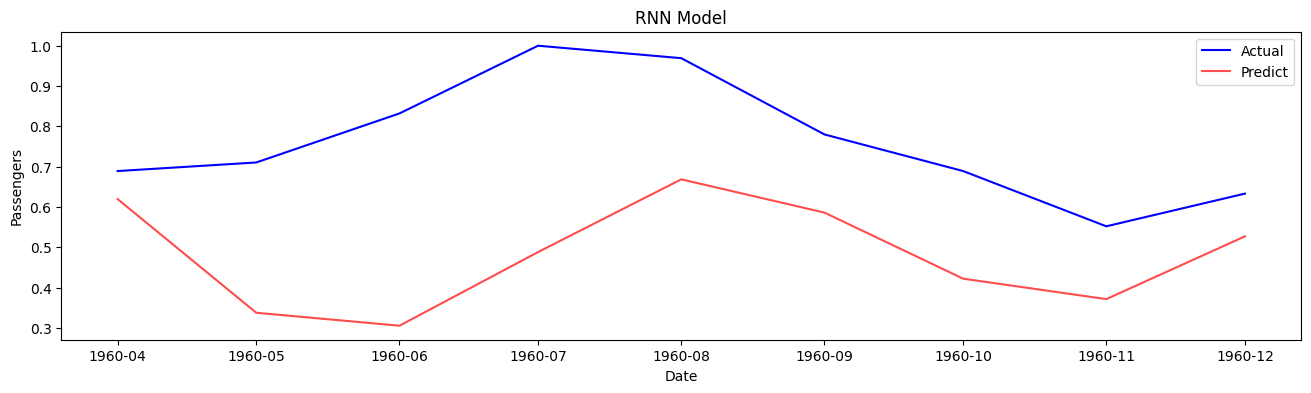

In [ ]:
plot_predictions(y_test, rnnPredict, "RNN Model", data.index[-9:])

LSTM


In [ ]:
rnnModel = Sequential()
rnnModel.add(LSTM(40, activation="selu", return_sequences=True, input_shape=(x_train.shape[1],1)))
rnnModel.add(Dropout(0.15))
rnnModel.add(LSTM(20, return_sequences=True, activation="selu"))
rnnModel.add(Dropout(0.1))
rnnModel.add(LSTM(10, activation="tanh"))
rnnModel.add(Dropout(0.2))
rnnModel.add(Dense(1))
rnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20, 40)            6720      
                                                                 
 dropout_5 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_4 (LSTM)               (None, 20, 20)            4880      
                                                                 
 dropout_6 (Dropout)         (None, 20, 20)            0         
                                                                 
 lstm_5 (LSTM)               (None, 10)                1240      
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
rnnModel.compile(optimizer="adam", loss="MSE")
rnnModel.fit(x_train, y_train, epochs=15, batch_size=50)

Epoch 1/15
3/3 [==============================] - 12s 87ms/step - loss: 0.2326
Epoch 2/15
3/3 [==============================] - 0s 97ms/step - loss: 0.0704
Epoch 3/15
3/3 [==============================] - 0s 80ms/step - loss: 0.0321
Epoch 4/15
3/3 [==============================] - 0s 66ms/step - loss: 0.0402
Epoch 5/15
3/3 [==============================] - 0s 100ms/step - loss: 0.0326
Epoch 6/15
3/3 [==============================] - 0s 64ms/step - loss: 0.0219
Epoch 7/15
3/3 [==============================] - 0s 69ms/step - loss: 0.0267
Epoch 8/15
3/3 [==============================] - 0s 67ms/step - loss: 0.0251
Epoch 9/15
3/3 [==============================] - 0s 72ms/step - loss: 0.0180
Epoch 10/15
3/3 [==============================] - 0s 111ms/step - loss: 0.0207
Epoch 11/15
3/3 [==============================] - 0s 99ms/step - loss: 0.0111
Epoch 12/15
3/3 [==============================] - 0s 88ms/step - loss: 0.0146
Epoch 13/15
3/3 [==============================] - 0s 77ms

In [ ]:
rnnPredict = rnnModel.predict(x_test)
rnnScore = r2_score(y_test, rnnPredict)
print("R2 Score : ", rnnScore)

1/1 [==============================] - 1s 1s/step
R2 Score :  -0.5330583192975045


In [ ]:
def plot_predictions(test, predicted, title, x):
    plt.figure(figsize=(16,4))
    plt.plot(x ,test, color='blue',label='Actual')
    plt.plot(x ,predicted, alpha=0.7, color='red',label='Predict')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()

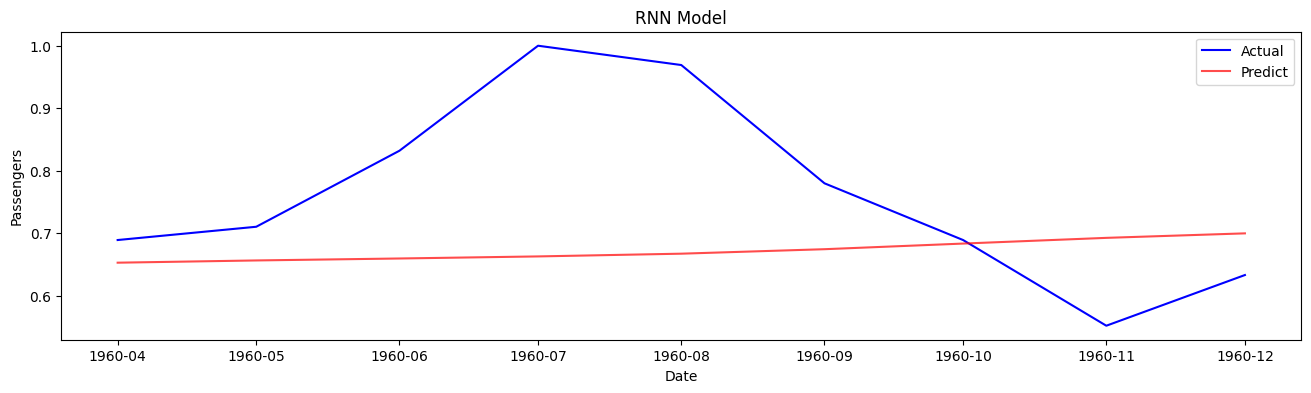

In [ ]:
plot_predictions(y_test, rnnPredict, "LSTM Model", data.index[-9:])

GRU

In [ ]:
rnnModel = Sequential()
rnnModel.add(GRU(40, activation="selu", return_sequences=True, input_shape=(x_train.shape[1],1)))
rnnModel.add(Dropout(0.15))
rnnModel.add(GRU(20, return_sequences=True, activation="selu"))
rnnModel.add(Dropout(0.1))
rnnModel.add(GRU(10, activation="tanh"))
rnnModel.add(Dropout(0.2))
rnnModel.add(Dense(1))
rnnModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 40)            5160      
                                                                 
 dropout_8 (Dropout)         (None, 20, 40)            0         
                                                                 
 gru_1 (GRU)                 (None, 20, 20)            3720      
                                                                 
 dropout_9 (Dropout)         (None, 20, 20)            0         
                                                                 
 gru_2 (GRU)                 (None, 10)                960       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
rnnModel.compile(optimizer="adam", loss="MSE")
rnnModel.fit(x_train, y_train, epochs=15, batch_size=50)

Epoch 1/15
3/3 [==============================] - 8s 70ms/step - loss: 0.1471
Epoch 2/15
3/3 [==============================] - 0s 59ms/step - loss: 0.0561
Epoch 3/15
3/3 [==============================] - 0s 66ms/step - loss: 0.0373
Epoch 4/15
3/3 [==============================] - 0s 62ms/step - loss: 0.0407
Epoch 5/15
3/3 [==============================] - 0s 61ms/step - loss: 0.0290
Epoch 6/15
3/3 [==============================] - 0s 63ms/step - loss: 0.0324
Epoch 7/15
3/3 [==============================] - 0s 59ms/step - loss: 0.0251
Epoch 8/15
3/3 [==============================] - 0s 58ms/step - loss: 0.0284
Epoch 9/15
3/3 [==============================] - 0s 62ms/step - loss: 0.0236
Epoch 10/15
3/3 [==============================] - 0s 59ms/step - loss: 0.0262
Epoch 11/15
3/3 [==============================] - 0s 63ms/step - loss: 0.0189
Epoch 12/15
3/3 [==============================] - 0s 63ms/step - loss: 0.0160
Epoch 13/15
3/3 [==============================] - 0s 69ms/st

In [ ]:
def plot_predictions(test, predicted, title, x):
    plt.figure(figsize=(16,4))
    plt.plot(x ,test, color='blue',label='Actual')
    plt.plot(x ,predicted, alpha=0.7, color='red',label='Predict')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()

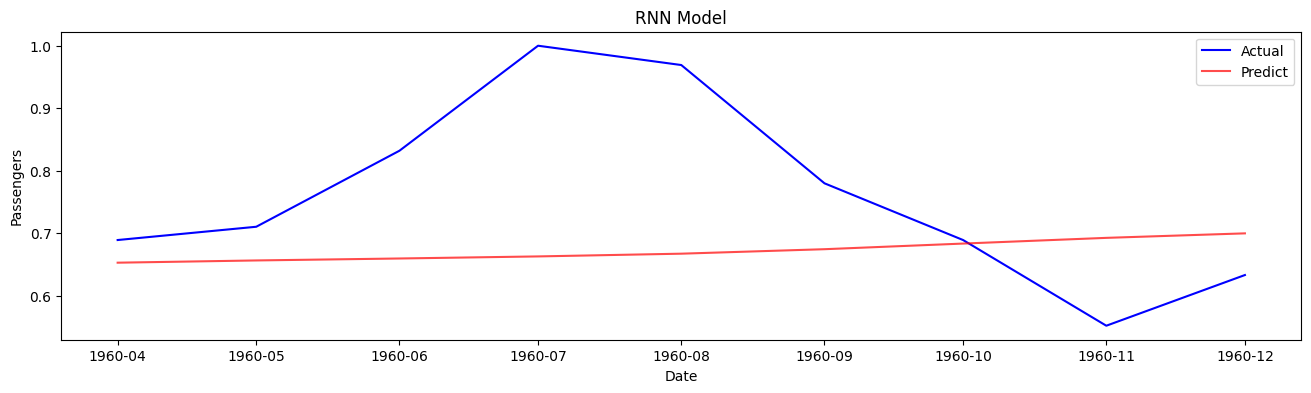

In [ ]:
plot_predictions(y_test, rnnPredict, "GRU Model", data.index[-9:])